<a href="https://colab.research.google.com/github/rishabhdikhit/Business-Case-YULU-Hypothesis-Testing/blob/main/yulu_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Yulu - Hypothesis Testing

## About Yulu

Yulu is India's leading **_micro-mobility service provider_**, which **_offers unique vehicles for the daily commute_**. Starting off as a **_mission to eliminate traffic congestion in India_**, Yulu provides the safest commute solution through a **_user-friendly mobile app to enable shared, solo and sustainable commuting._**

**_Yulu zones_** are located at all the appropriate locations (including **_metro stations, bus stands, office spaces, residential areas, corporate offices, etc_**) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want **_to understand the factors affecting the demand for these shared electric cycles in the Indian market_**.

## Problem Statement

The company wants to know:

* **Which variables are significant in predicting the demand for shared electric cycles in the Indian market?**
* **How well those variables describe the electric cycle demands**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import norm,t
from scipy.stats import poisson, expon,geom, ttest_1samp, ttest_ind,ttest_ind_from_stats
from scipy.stats import shapiro, levene, kruskal, chi2, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

Loading our dataset

In [ ]:
#Loading of the dataset
df=pd.read_csv("bike_sharing.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Observation on shape of data, data types of all the attributes, conversion of categorical attributes to 'category', missing value detection, statistical summary:

In [ ]:
#Checking of the shape of the data
df.shape

(10886, 12)

In [ ]:
#Checking number of unique values in attributes
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
#Checking the data types of all attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#Converting datetime from object to datetime category
df["datetime"]=pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
#Converting categorical variable to category type
df["season"]=df["season"].astype("object")
df["holiday"]=df["holiday"].astype("object")
df["workingday"]=df["workingday"].astype("object")
df["weather"]=df["weather"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
#Checking of missing values in the dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#Statistical summary of numeric variables in the dataset
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#Description of Object type data in dataset
df.describe(include="object")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [ ]:
#Description of datetime type data in dataset
df.describe(include="datetime")

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\3165184414.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="datetime")


,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1
first,2011-01-01 00:00:00
last,2012-12-19 23:00:00


# Univariate Analysis

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\977343850.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["temp"])


<AxesSubplot: xlabel='temp', ylabel='Density'>

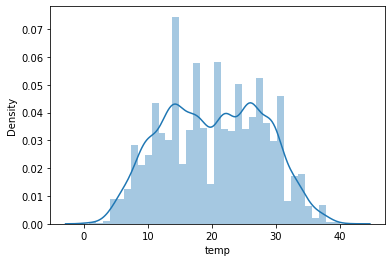

In [ ]:
#distplot for temp attribute
sns.distplot(df["temp"])

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\140082757.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["atemp"])


<AxesSubplot: xlabel='atemp', ylabel='Density'>

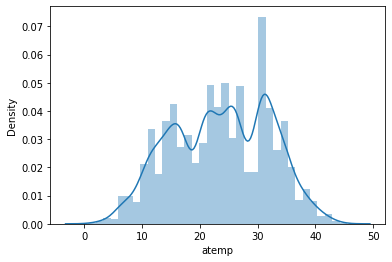

In [ ]:
#distplot for atemp attribute
sns.distplot(df["atemp"])

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\2949485006.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["humidity"])


<AxesSubplot: xlabel='humidity', ylabel='Density'>

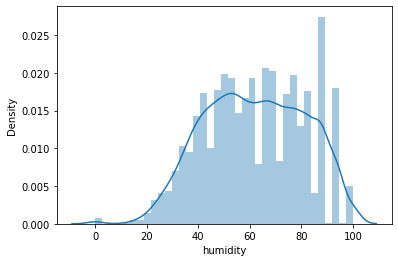

In [ ]:
#distplot for humidity attribute
sns.distplot(df["humidity"])

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\1122790581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["windspeed"])


<AxesSubplot: xlabel='windspeed', ylabel='Density'>

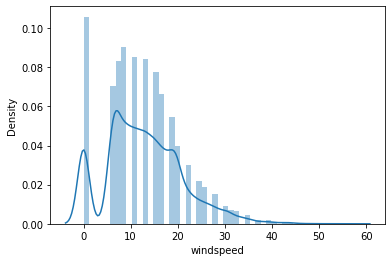

In [ ]:
#distplot for windspeed attribute
sns.distplot(df["windspeed"])

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\1210671214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["casual"])


<AxesSubplot: xlabel='casual', ylabel='Density'>

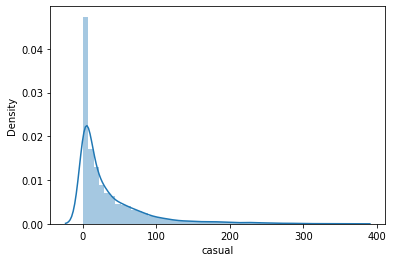

In [ ]:
#distplot for count of casual users
sns.distplot(df["casual"])

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\2876350083.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["registered"])


<AxesSubplot: xlabel='registered', ylabel='Density'>

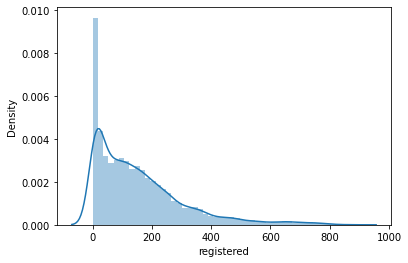

In [ ]:
#distplot for count of registered users
sns.distplot(df["registered"])

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\1194791850.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["count"])


<AxesSubplot: xlabel='count', ylabel='Density'>

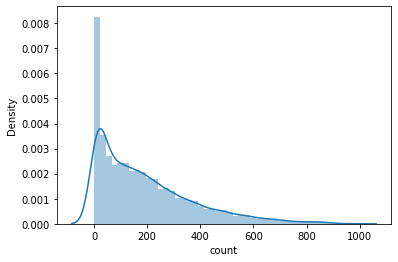

In [ ]:
#distplot for total rental bikes including both casual and registered
sns.distplot(df["count"])

<AxesSubplot: xlabel='temp', ylabel='Count'>

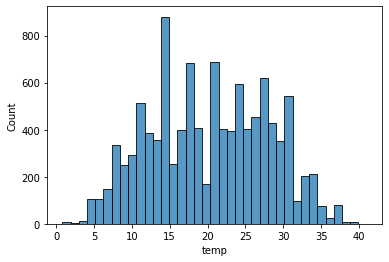

In [ ]:
#histplot for temp attribute
sns.histplot(df["temp"])

<AxesSubplot: xlabel='atemp', ylabel='Count'>

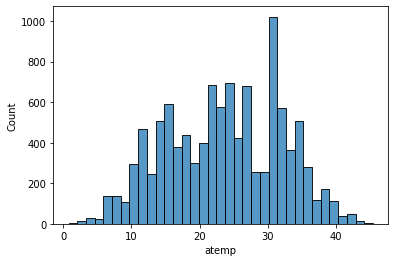

In [ ]:
#histplot for atemp attribute
sns.histplot(df["atemp"])

<AxesSubplot: xlabel='humidity', ylabel='Count'>

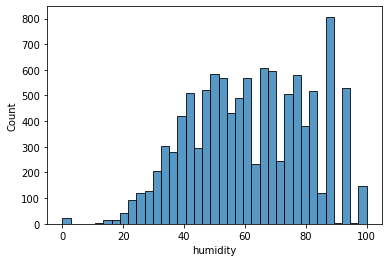

In [ ]:
#histplot for humidity attribute
sns.histplot(df["humidity"])

<AxesSubplot: xlabel='windspeed', ylabel='Count'>

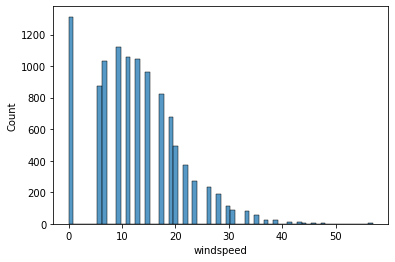

In [ ]:
#histplot for windspeed attribute
sns.histplot(df["windspeed"])

<AxesSubplot: xlabel='casual', ylabel='Count'>

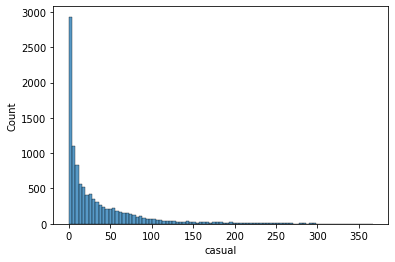

In [ ]:
#histplot for count of casual users
sns.histplot(df["casual"])

<AxesSubplot: xlabel='registered', ylabel='Count'>

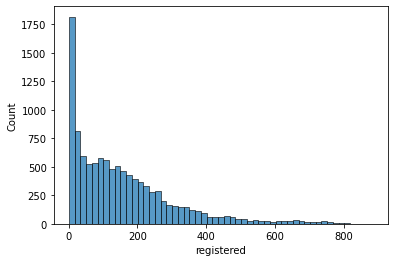

In [ ]:
#histplot for count of registered users
sns.histplot(df["registered"])

<AxesSubplot: xlabel='count', ylabel='Count'>

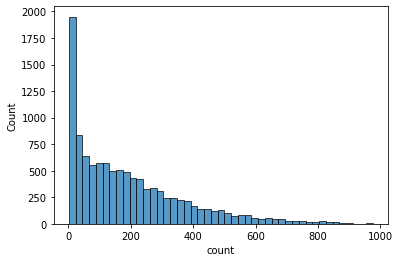

In [ ]:
#histplot for count of total rental bikes including both registered and casual
sns.histplot(df["count"])

<AxesSubplot: >

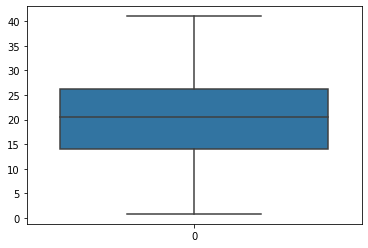

In [ ]:
#boxplot for temp attribute
sns.boxplot(df["temp"])

<AxesSubplot: >

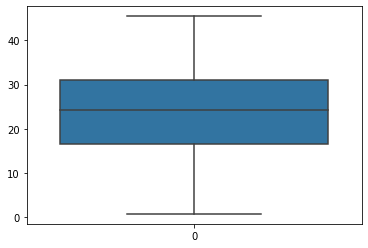

In [ ]:
#boxplot for atemp attribute
sns.boxplot(df["atemp"])

<AxesSubplot: >

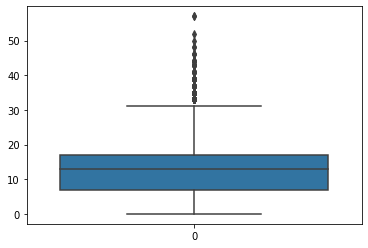

In [ ]:
#Boxplot for windspeed attribute
sns.boxplot(df["windspeed"])

<AxesSubplot: >

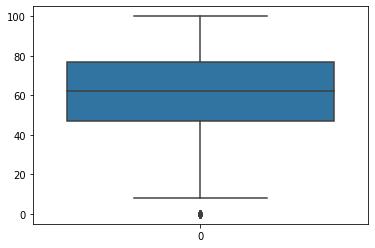

In [ ]:
#boxplot for humidity attribute
sns.boxplot(df["humidity"])

<AxesSubplot: >

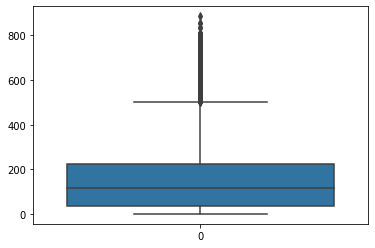

In [ ]:
#boxplot for count of registered users
sns.boxplot(df["registered"])

<AxesSubplot: >

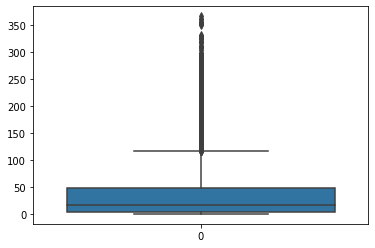

In [ ]:
#boxplot for count of casual users
sns.boxplot(df["casual"])

<AxesSubplot: >

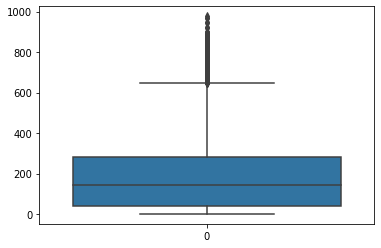

In [ ]:
#boxplot for count of total rental bikes including both casual and registered users
sns.boxplot(df["count"])

<AxesSubplot: xlabel='season', ylabel='count'>

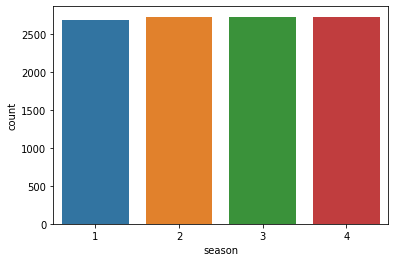

In [ ]:
#Countplot for seasons
sns.countplot(data=df,x="season")

<AxesSubplot: xlabel='holiday', ylabel='count'>

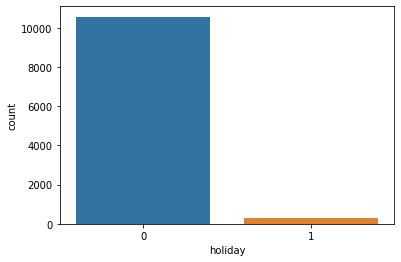

In [ ]:
#countplot for holidays categories
sns.countplot(data=df, x="holiday")

<AxesSubplot: xlabel='workingday', ylabel='count'>

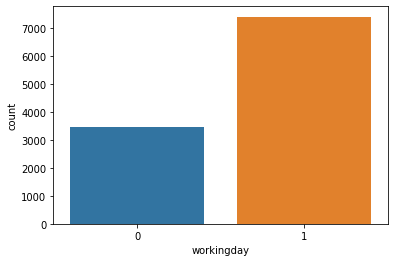

In [ ]:
#countplot for working days and non working days
sns.countplot(data=df,x="workingday")

<AxesSubplot: xlabel='weather', ylabel='count'>

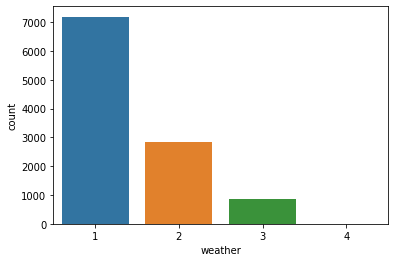

In [ ]:
#countplot for weather types
sns.countplot(data=df,x="weather")

# Bivariate Analysis

<AxesSubplot: xlabel='workingday', ylabel='count'>

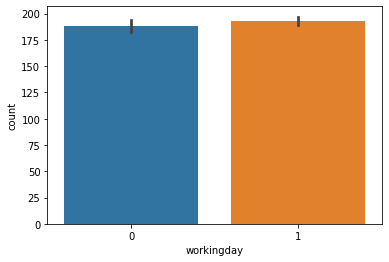

In [ ]:
#barplot between workingday and count to understand business based on workingday
sns.barplot(data=df, x="workingday", y="count")

<AxesSubplot: xlabel='holiday', ylabel='count'>

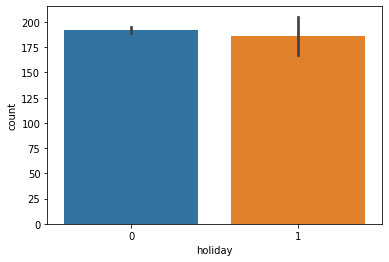

In [ ]:
#barplot between workingday and count to understand business based on holiday
sns.barplot(data=df, x="holiday", y="count")

<AxesSubplot: xlabel='season', ylabel='count'>

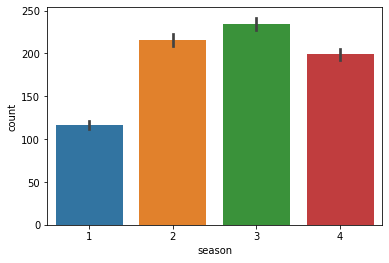

In [ ]:
#barplot between season and count to understand business based on season
sns.barplot(data=df, x="season", y="count")

<AxesSubplot: xlabel='weather', ylabel='count'>

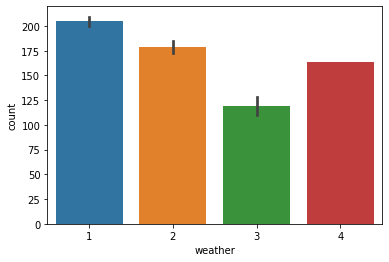

In [ ]:
#barplot between weather and count to understand business based on weather
sns.barplot(df, x="weather",y="count")

<AxesSubplot: xlabel='humidity', ylabel='count'>

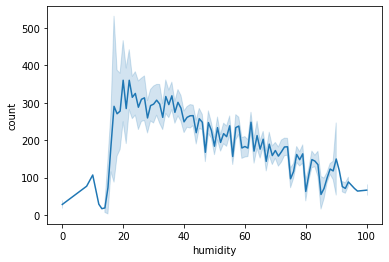

In [ ]:
#Lineplot between humidity and count
sns.lineplot(df, x="humidity",y="count")

<AxesSubplot: xlabel='weather', ylabel='count'>

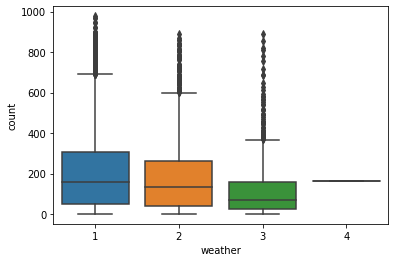

In [ ]:
#boxplot between weather and count to understand business based on weather
sns.boxplot(df, x="weather", y="count")

<AxesSubplot: xlabel='season', ylabel='count'>

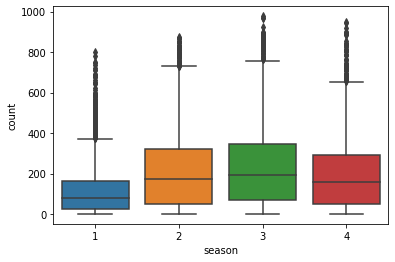

In [ ]:
#boxplot between season and count to understand business based on season
sns.boxplot(df,x="season", y="count")

<AxesSubplot: xlabel='workingday', ylabel='count'>

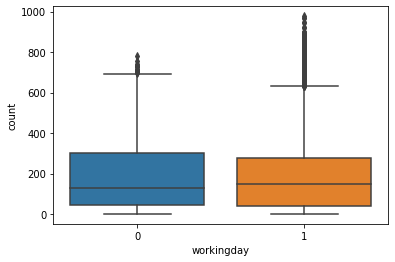

In [ ]:
#boxplot between workingday and count to understand business based on workingday
sns.boxplot(df,x="workingday", y="count")

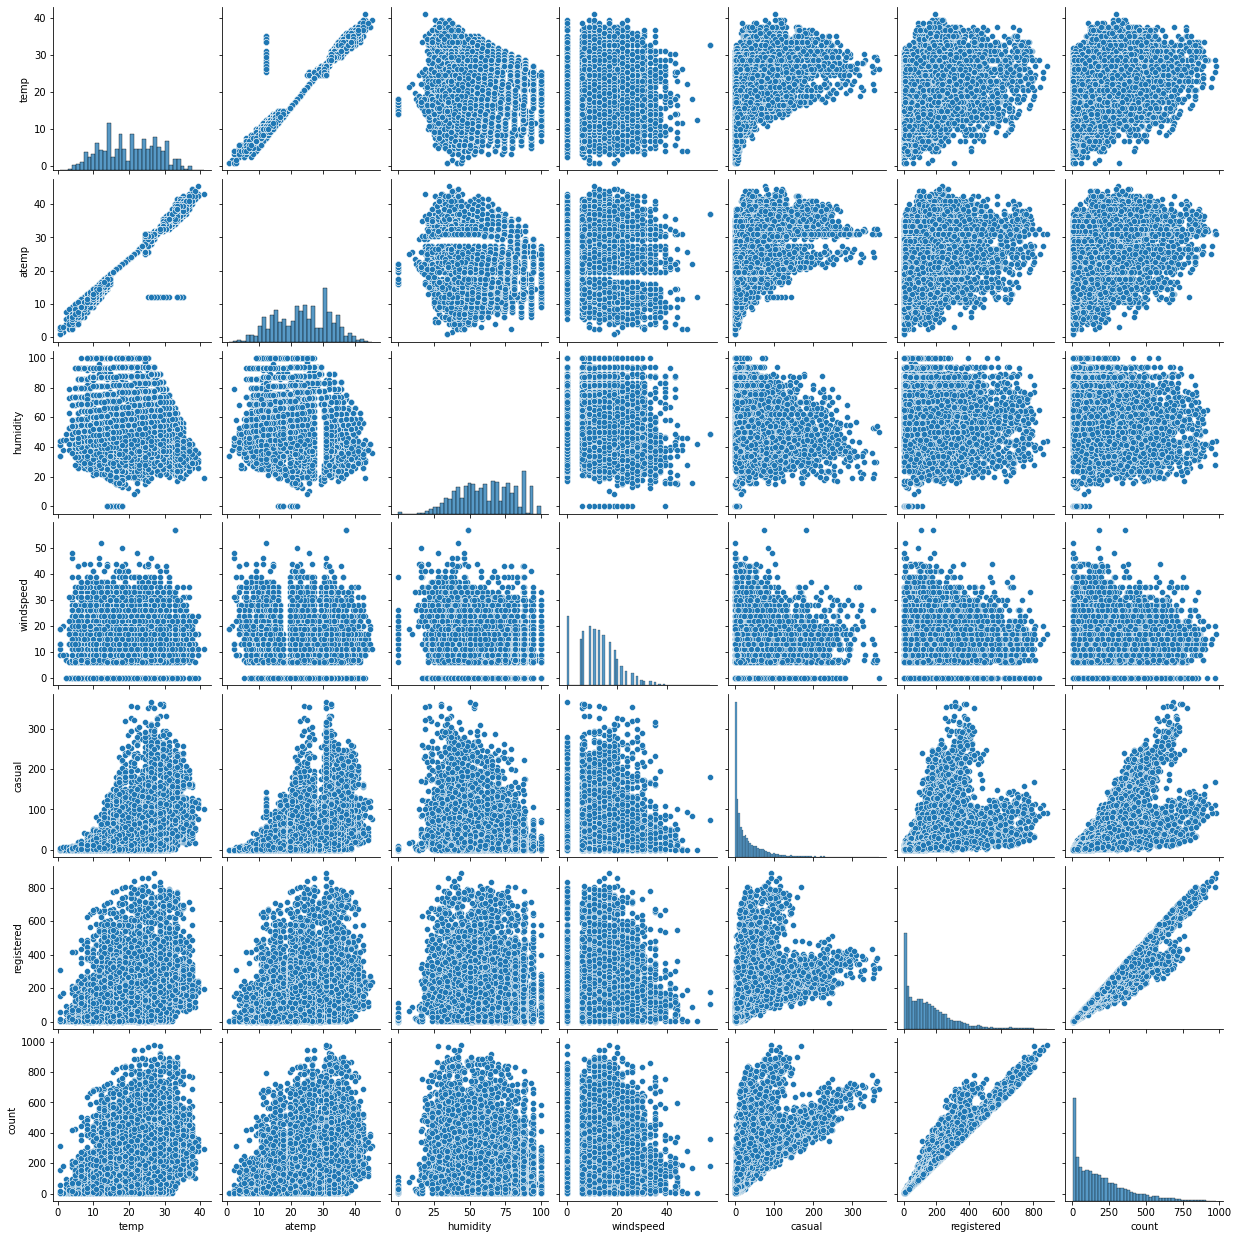

In [ ]:
#Pairplots in the dataframes having numeric datatype
sns.pairplot(df.loc[:,"temp":])

In [ ]:
#Correlation between different attributes of dataframe
df.corr()

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\2466234702.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_16072\4070634115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr())


<AxesSubplot: >

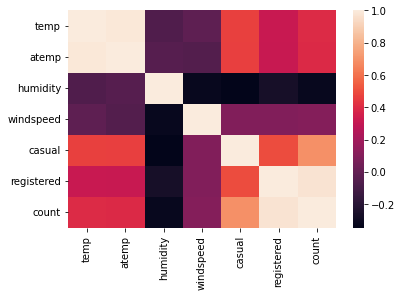

In [ ]:
#Heatmap based on correlation between attributes
sns.heatmap(data=df.corr())

# Dataset Info

datetime: It contains the date and time respondence to the given data. It ranges from 2011-01-01 to 2012-12-19.

season: It contains 4 values of the season that are spring, summer, fall, and winter

holiday: It gives whether a given day is a holiday or not.

working day: It gives whether the given day is a working day or a holiday or weekend

weather: It contains 4 different masked categories of weather

temp: It gives the temperature in Celsius at that moment, and its value ranges from 0.82 to 41.00.

atemp: It gives the feeling temperature in Celsius at that moment, and its value ranges from 0.76 to 45.45.

humidity: It gives the humidity at a given time, and its value ranges from 0.0 to 100.00

windspeed: It gives the values of windspeed at a given time, and its value ranges from 0.0 to 56.99

casual: It gives a count of casual users at a given time, and its value ranges from 0 to 367

registered: It gives a count of casual users at a given time, and its value ranges from 0 to 886

count: It gives a count of total rental bikes including both casual and registered, and its value ranges from 1 to 977.

Here Outliers are found by IQR method in casual, registered, and count columns, but as dropping or morphing of outliers may affect our statistical significance, so Its better to keep them in our data.

# 2 Sample T-Test

In [ ]:
#Filtering count based on working day
working_day_count= df.loc[df["workingday"]==1,"count"]
non_working_day_count=df.loc[df["workingday"]==0,"count"]

In [ ]:
#Mean and Standard Deviation of count during working day
working_day_count.mean(), working_day_count.std()

(193.01187263896384, 184.5136590421481)

In [ ]:
#Mean and Standard Deviation of count during Non-working day
non_working_day_count.mean(), non_working_day_count.std()

(188.50662061024755, 173.7240153250003)

Ho : mean of working day and non working day is same : mu1 = mu2

Ha : mean of working day is higher than non working day : mu1 > mu2

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
#Let we do t-test for 2 samples and find test_statistics and p-value
test_statistic, p_value = ttest_ind(working_day_count,non_working_day_count, alternative="greater")
test_statistic, p_value

(1.2096277376026694, 0.11322402113180674)

In [ ]:
#Decision based on p-value and significance level
if p_value < alpha:
    print("Reject Null Hypothesis Ho")
else:
    print("Fail to Reject Null Hypothesis Ho")

Fail to Reject Null Hypothesis Ho


We have considered a confidence level of 95% in the Test.

The 2 Sample T-Test between the count attributes of the working day and the non-working day  has been carried out and We found from the 2 Sample T-test that the means of both samples have no statistically significant difference.

## ANOVA Test

In [ ]:
#Filtering count based on weather category
weather_1 = df.loc[df["weather"]==1,"count"]
weather_2 = df.loc[df["weather"]==2,"count"]
weather_3 = df.loc[df["weather"]==3,"count"]
weather_4 = df.loc[df["weather"]==4,"count"]

In [ ]:
weather_4 #Only single value is there with weather category 4 so, We will not consider this category for ANOVA Test

5631    164
Name: count, dtype: int64

We will do shapiro Test for checking whether our sample follows Gaussian Distribution or not

Null and Alternate Hypothesis for Shapiro Test

H0: The sample follows Gaussian Distribution

Ha: The sample does not follow Gaussian Distribution

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
#p-value calculation
test_statistics, p_value = shapiro(weather_1)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


C:\Users\Pipaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#p-value calculation
test_statistics, p_value = shapiro(weather_2)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


In [ ]:
#p-value calculation
test_statistics, p_value = shapiro(weather_3)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


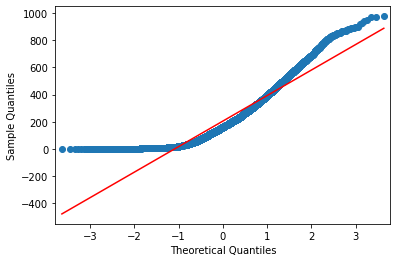

In [ ]:
#Let's check for normality based on q-q plot
qqplot(weather_1,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

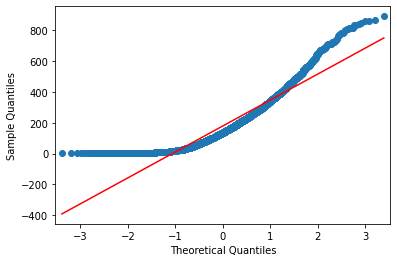

In [ ]:
#Let's check for normality based on q-q plot
qqplot(weather_2,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

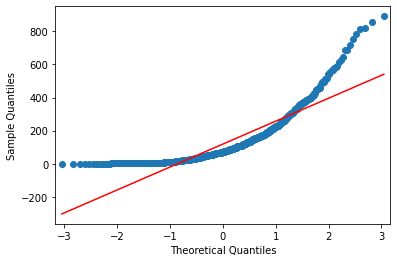

In [ ]:
#Let's check for normality based on q-q plot
qqplot(weather_3,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

We will do levene test to check whether variance of the samples are same or not

Null Hypothesis and Alternate Hypothesis for Levene Test

H0: Variances of the samples are same

Ha: Variances of the samples are not same

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
#p-value calculation
test_statistics, p_value=levene(weather_1,weather_2, weather_3)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Variances of the samples are not same")
else:
    print("Fail to Reject Null Hypothesis, Variances of the samples are same")

p-value: 0.0
Reject Null Hypotheis, Variances of the samples are not same


As we have done shapiro and Q-Q Plot for checking Normality and Levene Test for checking Variance.

We have found that Samples do not follow Gaussian Distribution and do not have similar variance. So we will go for Kruskal-Wallis Test

Null and Alternate Hypothesis for Kruskal Wallis Test

H0: mean of total rental bikes of different weathers are same

Ha: mean of total rental bikes of different weathers are not same

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
#p-value calculation
test_statistics,p_value=kruskal(weather_1,weather_2,weather_3)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, mean of total rental bikes of different weathers are not same")
else:
    print("Fail to Reject Null Hypothesis, mean of total rental bikes of different weathers are same")

p-value: 0.0
Reject Null Hypotheis, mean of total rental bikes of different weathers are not same


In [ ]:
#Filtering count based on weather category
season_1 = df.loc[df["season"]==1,"count"]
season_2 = df.loc[df["season"]==2,"count"]
season_3 = df.loc[df["season"]==3,"count"]
season_4 = df.loc[df["season"]==4,"count"]

We will do shapiro Test for checking whether our sample follows Gaussian Distribution or not

Null and Alternate Hypothesis for Shapiro Test

H0: The sample follows Gaussian Distribution

Ha: The sample does not follow Gaussian Distribution

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
#p-value calculation
test_statistics, p_value = shapiro(season_1)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


In [ ]:
#p-value calculation
test_statistics, p_value = shapiro(season_2)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


In [ ]:
#p-value calculation
test_statistics, p_value = shapiro(season_3)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


In [ ]:
#p-value calculation
test_statistics, p_value = shapiro(season_4)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


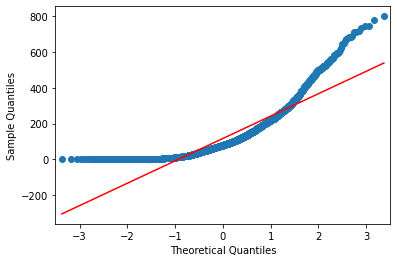

In [ ]:
#Let's check for normality based on q-q plot
qqplot(season_1,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

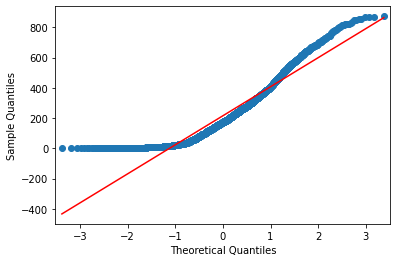

In [ ]:
#Let's check for normality based on q-q plot
qqplot(season_2,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

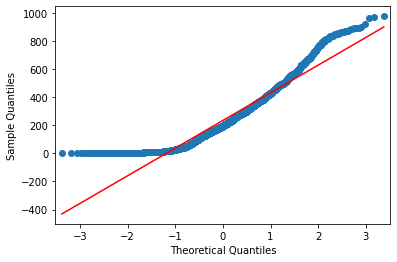

In [ ]:
#Let's check for normality based on q-q plot
qqplot(season_3,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

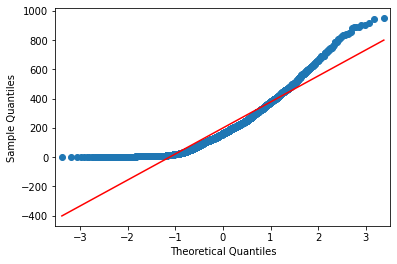

In [ ]:
#Let's check for normality based on q-q plot
qqplot(season_4,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

We will do levene test to check whether variance of the samples are same or not

Null Hypothesis and Alternate Hypothesis for Levene Test

H0: Variances of the samples are same

Ha: Variances of the samples are not same

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
#p-value calculation
test_statistics, p_value=levene(season_1, season_2, season_3, season_4)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Variances of the samples are not same")
else:
    print("Fail to Reject Null Hypothesis, Variances of the samples are same")

p-value: 0.0
Reject Null Hypotheis, Variances of the samples are not same


As we have done shapiro and Q-Q Plot for checking Normality and Levene Test for checking Variance.

We have found that Samples do not follow Gaussian Distribution and do not have similar variance. So we will go for Kruskal-Wallis Test

Null and Alternate Hypothesis for Kruskal Wallis Test

H0: mean of total rental bikes of different seasons are same

Ha: mean of total rental bikes of different seasons are not same

In [ ]:
#p-value calculation
test_statistics,p_value=kruskal(season_1, season_2, season_3, season_4)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, mean of total rental bikes of different seasons are not same")
else:
    print("Fail to Reject Null Hypothesis, mean of total rental bikes of different seasons are same")

p-value: 0.0
Reject Null Hypotheis, mean of total rental bikes of different seasons are not same


We have considered a confidence level of 95% in the Test.

For the assumptions testing like the shapiro-wilk test,  q-q plot, and levene test has also been done in the Jupyter Notebook.

As samples fail for normality tests and variance tests, we have carried out Kruskal Wallis Test.

From the Kruskal Walis Test, It can be said that the Means of total rental bikes for different weathers has a statistically significant difference.

From the Kruskal Walis Test, It can be said that the Means of total rental bikes for different seasons has a statistically significant difference.

# Chi-square Test

In [ ]:
#Creating Contingency table between categorical attributes weather and season
ws= pd.crosstab(df["weather"], df["season"])
ws

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
#Here in our contingency table there is value count of 1 and 0 for weather type 4
#we can not do chi-square test as minimum frequency to run chi-square test is 5
ws.loc[1:3,:]

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


Here For Chi-Square Test between weather and Season

Null and Alternate Hypothesis

H0: Seasons and weather are independent

Ha: Seasons and weather are dependent on each other

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
#p-value calculation
test_statistics,p_value, dof, exp=chi2_contingency(ws)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Seasons and weather are dependent on each other")
else:
    print("Fail to Reject Null Hypothesis, Seasons and weather are independent")

p-value: 0.0
Reject Null Hypotheis, Seasons and weather are dependent on each other


In [ ]:
#p-value calculation
test_statistics,p_value, dof, exp=chi2_contingency(ws.loc[1:3,:])
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Seasons and weather are dependent on each other")
else:
    print("Fail to Reject Null Hypothesis, Seasons and weather are independent")

p-value: 0.0
Reject Null Hypotheis, Seasons and weather are dependent on each other


We have considered a confidence level of 95% in the Test.

From the Chi-Square Test, We can say that weather and season are depended on each other.

# Insights
- The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
- Out of every 100 users, around 19 are casual users and 81 are registered users.
- The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
- There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
- The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
- There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
- More than 80 % of the time, the temperature is less than 28 degrees celcius.
- More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
- More than 85 % of the total, windspeed data has a value of less than 20.
- The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
- The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
- There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
- The hourly total number of rental bikes is statistically different for different weathers.
- There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
- The hourly total number of rental bikes is statistically different for different seasons.

# Recommendations
- **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

- **Time-based Pricing**: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

- **Weather-based Promotions**: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

- **User Segmentation**: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

- **Optimize Inventory**: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

- **Improve Weather Data Collection**: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

- **Customer Comfort**: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

- **Collaborations with Weather Services**: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

- **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

- **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

- **Social Media Marketing**: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

- **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.